# HW5 : Logistic Regression

### Import Data

In [42]:
import sys
!{sys.executable} pip install --upgrade pip
!{sys.executable} -m pip install sklearn

/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/Resources/Python.app/Contents/MacOS/Python: can't open file 'pip': [Errno 2] No such file or directory


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from pandas.plotting import scatter_matrix

In [44]:
df = pd.read_csv('HW4_movie_metadata.csv')
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [45]:
df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

Mean : 6.442137616498116
Median : 6.6
SD : 1.125004307964885


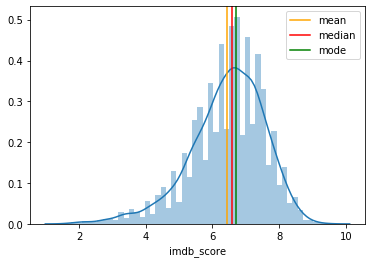

In [47]:
sns.distplot(df['imdb_score'],bins=50)
plt.axvline(x=df['imdb_score'].mean(), color='orange', label='mean')
plt.axvline(x=df['imdb_score'].median(), color='red', label='median')
plt.axvline(x=df['imdb_score'].mode()[0], color='green', label='mode')
plt.legend()

print('Mean : {}'.format(df['imdb_score'].mean()))
print('Median : {}'.format(df['imdb_score'].median()))
print('SD : {}'.format(np.std(df['imdb_score'])))

In [48]:
df.reset_index(drop=True, inplace=True)
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [49]:
use_col = ['duration', 'director_facebook_likes', 'actor_1_facebook_likes', 'num_user_for_reviews',
           'actor_2_facebook_likes', 'actor_3_facebook_likes', 'num_voted_users',
           'cast_total_facebook_likes', 'gross', 'budget', 'movie_facebook_likes',
           'num_critic_for_reviews']
sel_df = df[use_col]
sel_df.head()

,duration,director_facebook_likes,actor_1_facebook_likes,num_user_for_reviews,actor_2_facebook_likes,actor_3_facebook_likes,num_voted_users,cast_total_facebook_likes,gross,budget,movie_facebook_likes,num_critic_for_reviews
0,178.0,0.0,1000.0,3054.0,936.0,855.0,886204,4834,760505847.0,237000000.0,33000,723.0
1,169.0,563.0,40000.0,1238.0,5000.0,1000.0,471220,48350,309404152.0,300000000.0,0,302.0
2,148.0,0.0,11000.0,994.0,393.0,161.0,275868,11700,200074175.0,245000000.0,85000,602.0
3,164.0,22000.0,27000.0,2701.0,23000.0,23000.0,1144337,106759,448130642.0,250000000.0,164000,813.0
4,NaN,131.0,131.0,NaN,12.0,NaN,8,143,NaN,NaN,0,NaN


In [50]:
sel_df.isna().sum()

duration                      15
director_facebook_likes      104
actor_1_facebook_likes         7
num_user_for_reviews          21
actor_2_facebook_likes        13
actor_3_facebook_likes        23
num_voted_users                0
cast_total_facebook_likes      0
gross                        884
budget                       492
movie_facebook_likes           0
num_critic_for_reviews        50
dtype: int64

In [51]:
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy="median").fit(sel_df)
sel_data = median_imputer.transform(sel_df)
sel_df_no_nan = pd.DataFrame(sel_data, columns=sel_df.columns)
sel_df_no_nan.head()

,duration,director_facebook_likes,actor_1_facebook_likes,num_user_for_reviews,actor_2_facebook_likes,actor_3_facebook_likes,num_voted_users,cast_total_facebook_likes,gross,budget,movie_facebook_likes,num_critic_for_reviews
0,178.0,0.0,1000.0,3054.0,936.0,855.0,886204.0,4834.0,760505847.0,237000000.0,33000.0,723.0
1,169.0,563.0,40000.0,1238.0,5000.0,1000.0,471220.0,48350.0,309404152.0,300000000.0,0.0,302.0
2,148.0,0.0,11000.0,994.0,393.0,161.0,275868.0,11700.0,200074175.0,245000000.0,85000.0,602.0
3,164.0,22000.0,27000.0,2701.0,23000.0,23000.0,1144337.0,106759.0,448130642.0,250000000.0,164000.0,813.0
4,103.0,131.0,131.0,156.0,12.0,371.5,8.0,143.0,25517500.0,20000000.0,0.0,110.0


In [52]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_minmax = pd.DataFrame(MinMaxScaler().fit_transform(sel_df_no_nan), columns=sel_df_no_nan.columns)
df_standard = pd.DataFrame(StandardScaler().fit_transform(sel_df_no_nan), columns=sel_df_no_nan.columns)

In [53]:
df_minmax.head()

,duration,director_facebook_likes,actor_1_facebook_likes,num_user_for_reviews,actor_2_facebook_likes,actor_3_facebook_likes,num_voted_users,cast_total_facebook_likes,gross,budget,movie_facebook_likes,num_critic_for_reviews
0,0.339286,0.000000,0.001563,0.603479,0.006832,0.037174,0.524453,0.007361,1.000000,0.019402,0.094556,0.889163
1,0.321429,0.024478,0.062500,0.244515,0.036496,0.043478,0.278865,0.073622,0.406840,0.024559,0.000000,0.370690
2,0.279762,0.000000,0.017188,0.196284,0.002869,0.007000,0.163256,0.017816,0.263080,0.020056,0.243553,0.740148
3,0.311508,0.956522,0.042188,0.533702,0.167883,1.000000,0.677216,0.162561,0.589253,0.020466,0.469914,1.000000
4,0.190476,0.005696,0.000205,0.030638,0.000088,0.016152,0.000002,0.000218,0.033553,0.001637,0.000000,0.134236


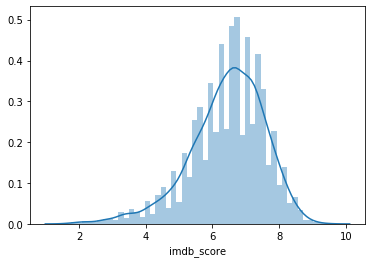

In [54]:
sns.distplot(df['imdb_score'],bins=50)

## Transfer IMDB_Score

Mean : 6.442137616498116
Median : 6.6
SD : 1.125004307964885


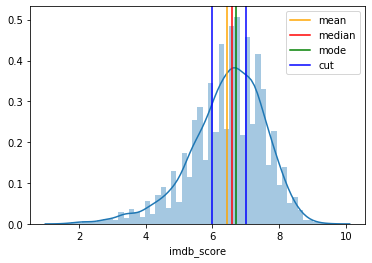

In [55]:
sns.distplot(df['imdb_score'],bins=50)
plt.axvline(x=df['imdb_score'].mean(), color='orange', label='mean')
plt.axvline(x=df['imdb_score'].median(), color='red', label='median')
plt.axvline(x=df['imdb_score'].mode()[0], color='green', label='mode')
plt.axvline(x=6, color='blue', label='cut')
plt.axvline(x=7, color='blue')
plt.legend()

print('Mean : {}'.format(df['imdb_score'].mean()))
print('Median : {}'.format(df['imdb_score'].median()))
print('SD : {}'.format(np.std(df['imdb_score'])))


In [56]:
print((df['imdb_score'][(df.imdb_score > 6) & (df.imdb_score < 7)].count()/df['imdb_score'].count()))

0.33313503866745986


In [57]:
def isImdbHigh(score):
    if score>7:
        return 1
    elif score>6.2:
        return np.NaN
    else:
        return 0

In [58]:
df['is_imdb_high']=df['imdb_score'].apply(isImdbHigh)

In [59]:
df[['is_imdb_high','imdb_score']].describe()

,is_imdb_high,imdb_score
count,3533.000000,5043.000000
mean,0.451175,6.442138
std,0.497681,1.125116
min,0.000000,1.600000
25%,0.000000,5.800000
50%,0.000000,6.600000
75%,1.000000,7.200000
max,1.000000,9.500000


In [60]:
sel_df_no_nan['is_imdb_high'] = df['is_imdb_high']
sel_df_no_nan['imdb_score'] = df['imdb_score']
sel_df_no_nan.dropna(subset=['is_imdb_high'],inplace=True)
sel_df_no_nan

,duration,director_facebook_likes,actor_1_facebook_likes,num_user_for_reviews,actor_2_facebook_likes,actor_3_facebook_likes,num_voted_users,cast_total_facebook_likes,gross,budget,movie_facebook_likes,num_critic_for_reviews,is_imdb_high,imdb_score
0,178.0,0.0,1000.0,3054.0,936.0,855.0,886204.0,4834.0,760505847.0,237000000.0,33000.0,723.0,1.0,7.9
1,169.0,563.0,40000.0,1238.0,5000.0,1000.0,471220.0,48350.0,309404152.0,300000000.0,0.0,302.0,1.0,7.1
3,164.0,22000.0,27000.0,2701.0,23000.0,23000.0,1144337.0,106759.0,448130642.0,250000000.0,164000.0,813.0,1.0,8.5
4,103.0,131.0,131.0,156.0,12.0,371.5,8.0,143.0,25517500.0,20000000.0,0.0,110.0,1.0,7.1
6,156.0,0.0,24000.0,1902.0,11000.0,4000.0,383056.0,46055.0,336530303.0,258000000.0,0.0,392.0,0.0,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,84.0,5.0,21.0,3.0,20.0,12.0,156.0,62.0,25517500.0,20000000.0,22.0,110.0,0.0,6.1
5031,82.0,120.0,785.0,8.0,98.0,84.0,133.0,1111.0,25517500.0,200000.0,424.0,13.0,0.0,5.4
5036,84.0,2.0,45.0,1.0,44.0,2.0,36.0,93.0,25517500.0,3250.0,4.0,110.0,1.0,7.8
5038,87.0,2.0,637.0,6.0,470.0,318.0,629.0,2283.0,25517500.0,20000000.0,84.0,1.0,1.0,7.7


In [61]:
sel_df_no_nan.corr()['is_imdb_high'].sort_values()

budget                       0.027966
actor_3_facebook_likes       0.034033
actor_1_facebook_likes       0.060187
cast_total_facebook_likes    0.067485
actor_2_facebook_likes       0.075563
gross                        0.170138
director_facebook_likes      0.176249
movie_facebook_likes         0.256214
duration                     0.263822
num_user_for_reviews         0.296869
num_critic_for_reviews       0.316699
num_voted_users              0.384512
imdb_score                   0.856132
is_imdb_high                 1.000000
Name: is_imdb_high, dtype: float64

# Train non selected features

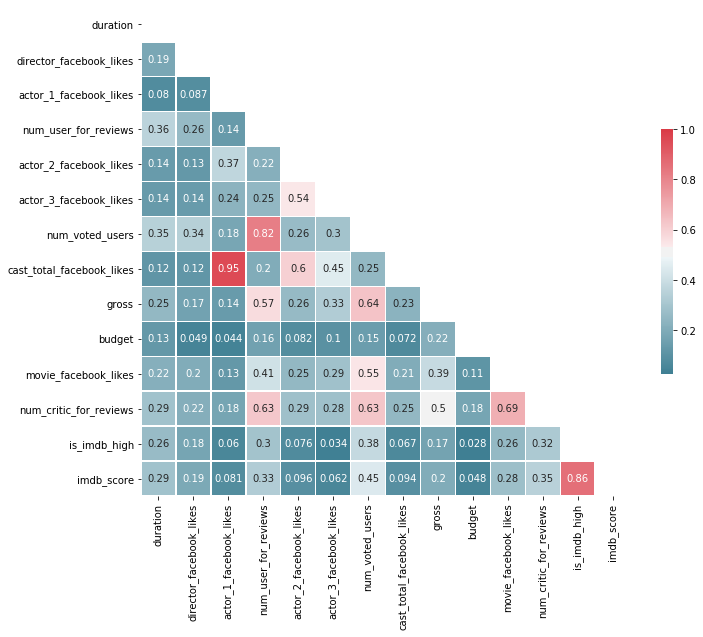

In [62]:
corr = sel_df_no_nan.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, n=5, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [63]:
sel_df_no_nan.drop(['imdb_score'],axis=1,inplace=True)

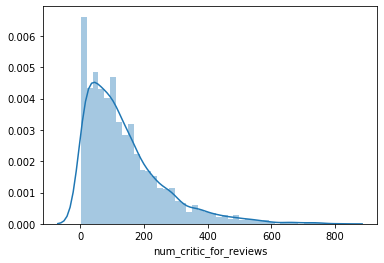

In [64]:
sns.distplot(sel_df_no_nan['num_critic_for_reviews'].dropna())

In [65]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
def evaluate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    cr = classification_report(y_true, y_pred)
    return cr, cm, f1, accuracy

def plot_cm(cm, norm=True):
    if norm:
        cm = cm/cm.sum(axis=0)
    sns.heatmap(cm, annot=True)
    plt.xlabel('Ground Truth')
    plt.ylabel('Prediction')
    plt.title('Confusion Matrix')
    plt.show()

In [66]:
from sklearn.model_selection import train_test_split
X=sel_df_no_nan.drop('is_imdb_high',axis=1).values
y=sel_df_no_nan['is_imdb_high'].values
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=44)

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [68]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
predictions = model.predict(X_test)

In [70]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))


              precision    recall  f1-score   support

         0.0       0.75      0.89      0.81       604
         1.0       0.81      0.60      0.69       456

    accuracy                           0.77      1060
   macro avg       0.78      0.75      0.75      1060
weighted avg       0.77      0.77      0.76      1060

[[538  66]
 [181 275]]


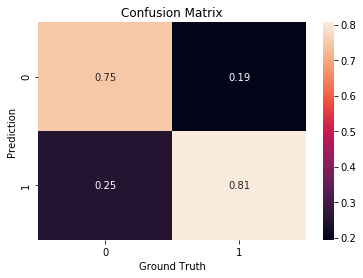

              precision    recall  f1-score   support

         0.0       0.75      0.89      0.81       604
         1.0       0.81      0.60      0.69       456

    accuracy                           0.77      1060
   macro avg       0.78      0.75      0.75      1060
weighted avg       0.77      0.77      0.76      1060



In [71]:
cr,  cm, f1, acc = evaluate(y_test, predictions)
plot_cm(cm)
print(cr)

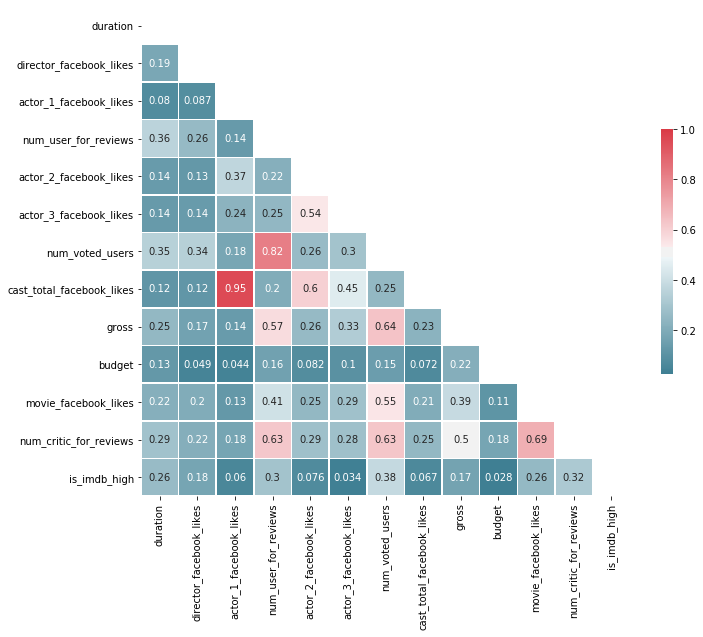

In [72]:
corr = sel_df_no_nan.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, n=5, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Train selected features

In [73]:
sel_df_no_nan.drop(['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','cast_total_facebook_likes','num_user_for_reviews','budget'],axis=1,inplace=True)
sel_df_no_nan

,duration,director_facebook_likes,num_voted_users,gross,movie_facebook_likes,num_critic_for_reviews,is_imdb_high
0,178.0,0.0,886204.0,760505847.0,33000.0,723.0,1.0
1,169.0,563.0,471220.0,309404152.0,0.0,302.0,1.0
3,164.0,22000.0,1144337.0,448130642.0,164000.0,813.0,1.0
4,103.0,131.0,8.0,25517500.0,0.0,110.0,1.0
6,156.0,0.0,383056.0,336530303.0,0.0,392.0,0.0
...,...,...,...,...,...,...,...
5030,84.0,5.0,156.0,25517500.0,22.0,110.0,0.0
5031,82.0,120.0,133.0,25517500.0,424.0,13.0,0.0
5036,84.0,2.0,36.0,25517500.0,4.0,110.0,1.0
5038,87.0,2.0,629.0,25517500.0,84.0,1.0,1.0


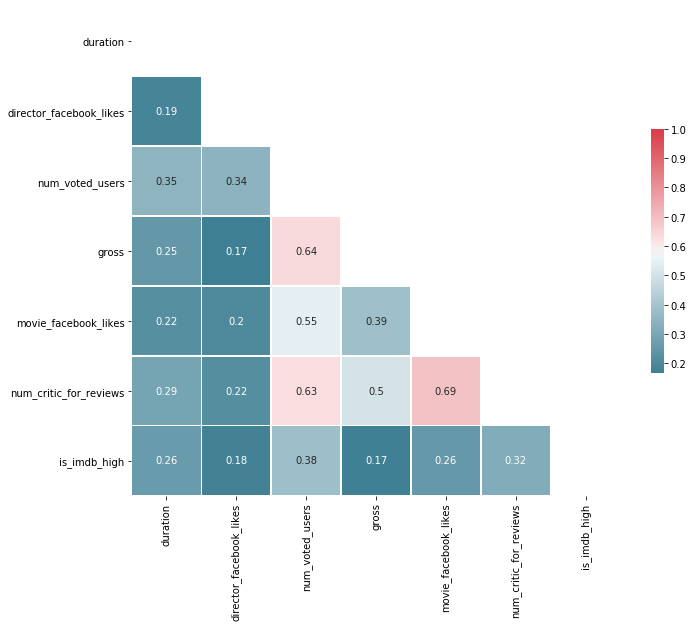

In [74]:
corr = sel_df_no_nan.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, n=5, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [75]:
X=sel_df_no_nan.drop('is_imdb_high',axis=1).values
y=sel_df_no_nan['is_imdb_high'].values
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=44)

model = LogisticRegression()
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

model.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
predictions = model.predict(X_test)

In [77]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.74      0.90      0.81       604
         1.0       0.81      0.59      0.68       456

    accuracy                           0.76      1060
   macro avg       0.78      0.74      0.75      1060
weighted avg       0.77      0.76      0.76      1060

[[543  61]
 [189 267]]


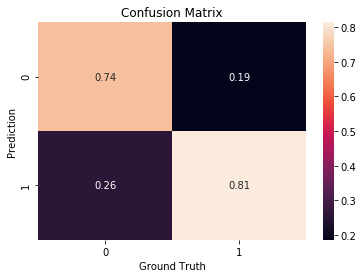

              precision    recall  f1-score   support

         0.0       0.74      0.90      0.81       604
         1.0       0.81      0.59      0.68       456

    accuracy                           0.76      1060
   macro avg       0.78      0.74      0.75      1060
weighted avg       0.77      0.76      0.76      1060



In [78]:
cr,  cm, f1, acc = evaluate(y_test, predictions)
plot_cm(cm)
print(cr)

In [79]:
X=sel_df_no_nan.drop('is_imdb_high',axis=1).values
y=sel_df_no_nan['is_imdb_high'].values
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=44)

model = LogisticRegression()
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
predictions = model.predict(X_test)

In [81]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.72      0.89      0.80       397
         1.0       0.81      0.56      0.66       310

    accuracy                           0.75       707
   macro avg       0.77      0.73      0.73       707
weighted avg       0.76      0.75      0.74       707

[[355  42]
 [135 175]]


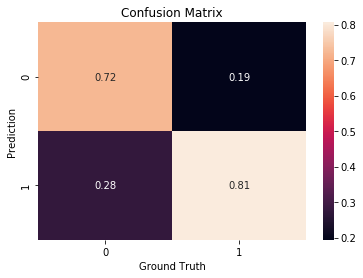

              precision    recall  f1-score   support

         0.0       0.72      0.89      0.80       397
         1.0       0.81      0.56      0.66       310

    accuracy                           0.75       707
   macro avg       0.77      0.73      0.73       707
weighted avg       0.76      0.75      0.74       707



In [82]:
cr,  cm, f1, acc = evaluate(y_test, predictions)
plot_cm(cm)
print(cr)